IE360- HW1 

Introduction

It is essential to comprehend the dynamics of consumer borrowing behavior in order to evaluate the stability and well-being of an economy. In Turkey, consumer borrowing is a major factor influencing market movements and economic activity. The purpose of this study is to investigate the connections between Turkey's consumer borrowing habits, interest rates, housing market activity, and consumer confidence and answer the following research question: How do consumer confidence, housing market activity, and interest rates impact consumer borrowing behavior in Turkey? We seek to identify the variables impacting consumer borrowing decisions by examining three important datasets: the House Sale Statistics (especially second-hand sales), the Consumer Confidence Index (CCI), and the Weighted Average Interest Rates for Consumer Loans. These statistics provide insightful information about the dynamics of the housing market, consumer mood, and borrowing costs—all of which have an effect on credit markets and consumer behavior.

Three time series selected from CBRT are the following:
1- House and Construction Statistics- House Sale Statistics- Second Hand Sale- Turkey

2- Interest Rate Statistics- Weighted Average Interest Rates for Bank Loans- Consumer Loan

3- Consumer Tendency Survey- Seasonally unadjusted Consumer Confidence Index and Indices of Consumer Tendency Survey Questions-Statement on current financial situation of household


Part 1- Correlation Analysis

In [41]:
library(readxl)
maddi_durum_file <- "maddi_durum.xlsx"
faiz_file <- "Tüketici Kredisi.xlsx"
konut_file <- "konut.xlsx"

In [42]:
maddi_durum_data <- read_excel(maddi_durum_file)
faiz_data <- read_excel(faiz_file)
konut_data <- read_excel(konut_file)

In [43]:
interest_rate <- faiz_data[[2]]
financial_situation <- maddi_durum_data[[2]]
house_sales <- konut_data[[2]]

In [44]:
correlation_matrix <- cor(cbind(interest_rate, house_sales, financial_situation), use = "pairwise.complete.obs")

In [45]:
print(correlation_matrix)

                    interest_rate house_sales financial_situation
interest_rate           1.0000000  -0.2410075           0.3050132
house_sales            -0.2410075   1.0000000          -0.4849404
financial_situation     0.3050132  -0.4849404           1.0000000


The weak correlations between consumer confidence, housing market activity, interest rates, and consumer borrowing behavior suggest that each of these variables can be considered independently as predictors of consumer borrowing behavior.

Part 2- Time Series Data Manipulation and Visualization

Time Series Plots of the Chosen Series

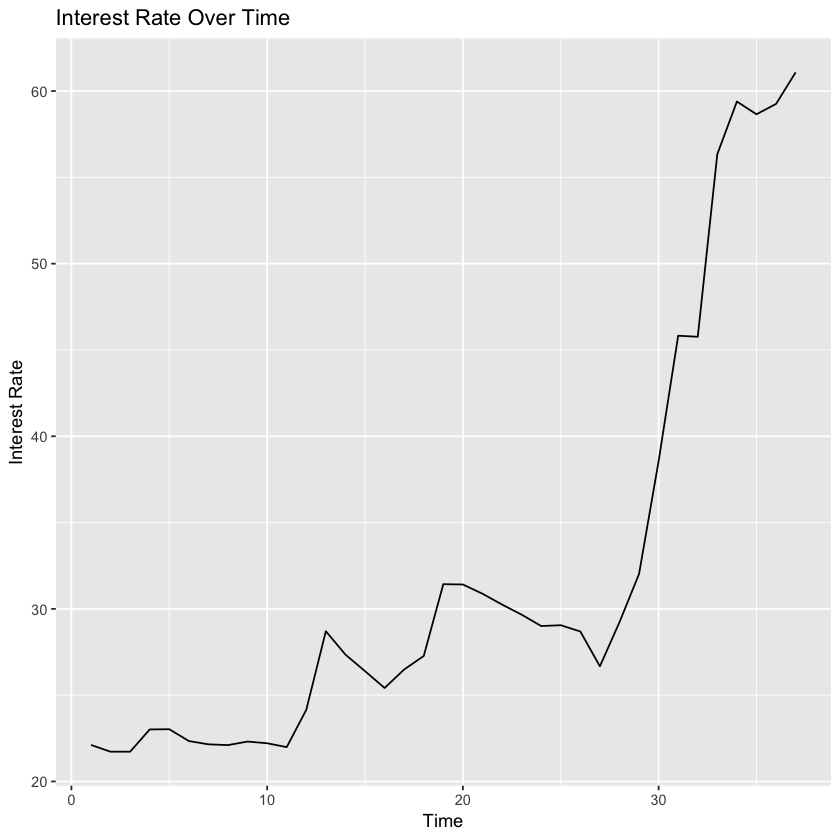

In [105]:
# Create data frames
df_interest_rate <- data.frame(date = seq_along(interest_rate), value = interest_rate)
df_financial_situation <- data.frame(date = seq_along(financial_situation), value = financial_situation)
df_house_sales <- data.frame(date = seq_along(house_sales), value = house_sales)

# Plotting
# Time plot for interest rate
ggplot(df_interest_rate, aes(x = date, y = value)) +
  geom_line() +
  labs(title = "Interest Rate Over Time",
       x = "Time",
       y = "Interest Rate")



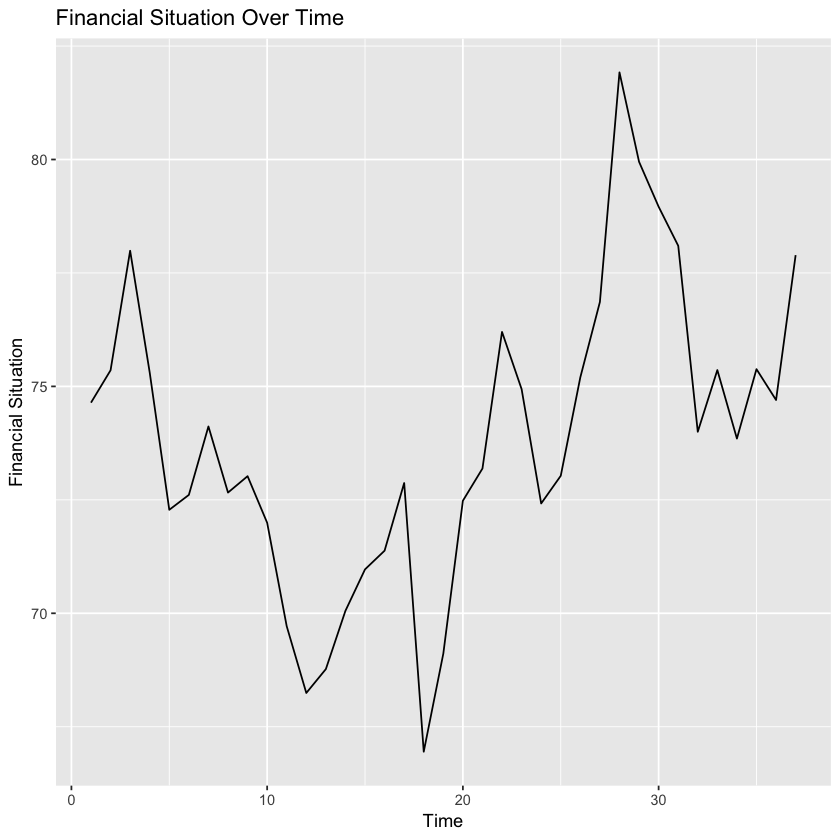

In [63]:
# Time plot for financial situation
ggplot(df_financial_situation, aes(x = date, y = value)) +
  geom_line() +
  labs(title = "Financial Situation Over Time",
       x = "Time",
       y = "Financial Situation")

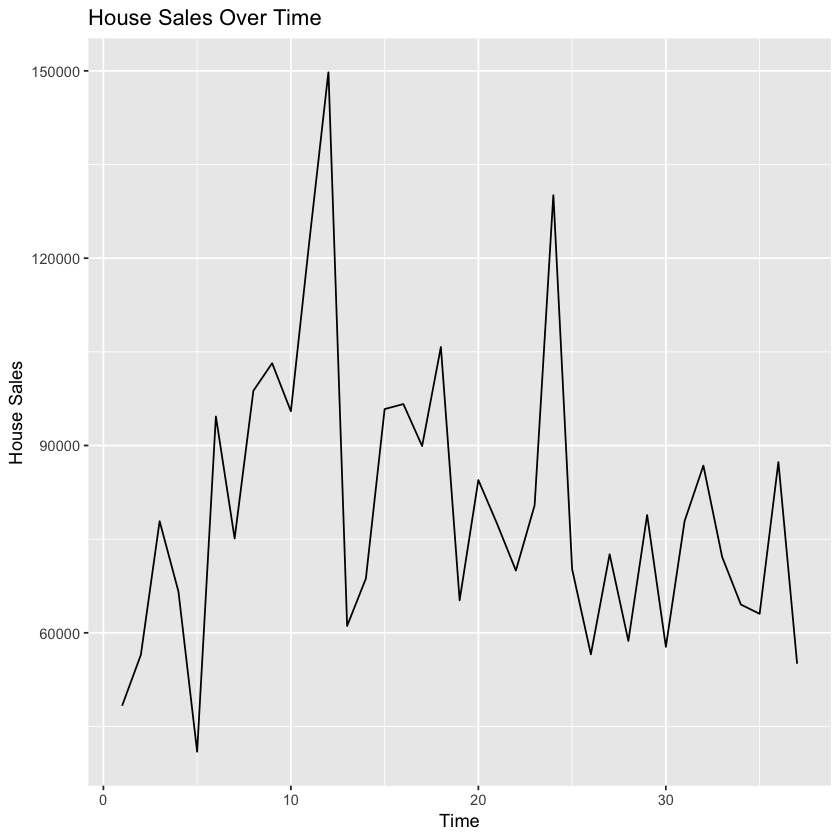

In [64]:
# Time plot for house sales
ggplot(df_house_sales, aes(x = date, y = value)) +
  geom_line() +
  labs(title = "House Sales Over Time",
       x = "Time",
       y = "House Sales")

Time Series Plot of Search Volume of "Emlak" 

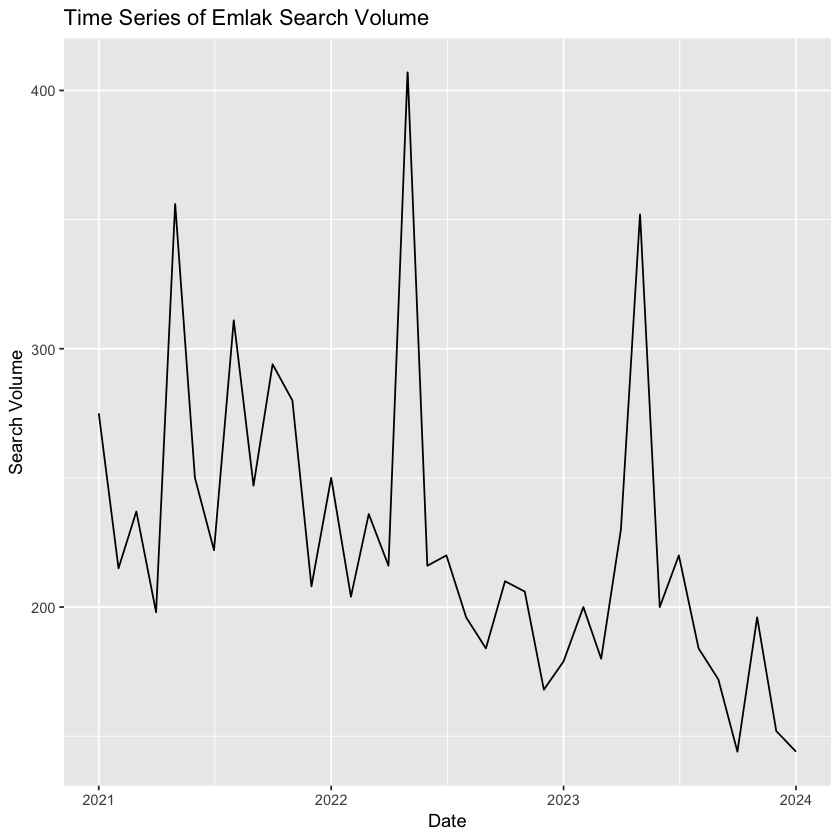

In [109]:
# Read the Excel file
df <- read_excel("emlak_keyword.xlsx")

# Convert "Tarih" column to Date
df$Tarih <- as.Date(paste(df$Tarih, "-01", sep = ""), format = "%Y-%m-%d")

# Plot the time series
ggplot(df, aes(x = Tarih, y = Emlak)) +
  geom_line() +
  labs(title = "Time Series of Emlak Search Volume",
       x = "Date",
       y = "Search Volume")

Scatterplots are used to explore and visualize relationships between time series by plotting one series against the other. For example, in order to see how House Sales are related to Search Volume of "Emlak", we need to plot them against each other: House Sales is on the y-axis, while Search Volume is on the x-axis. Then the correlation coefficients can be calculated to measure the strength of the linear relationship between the two variables. 

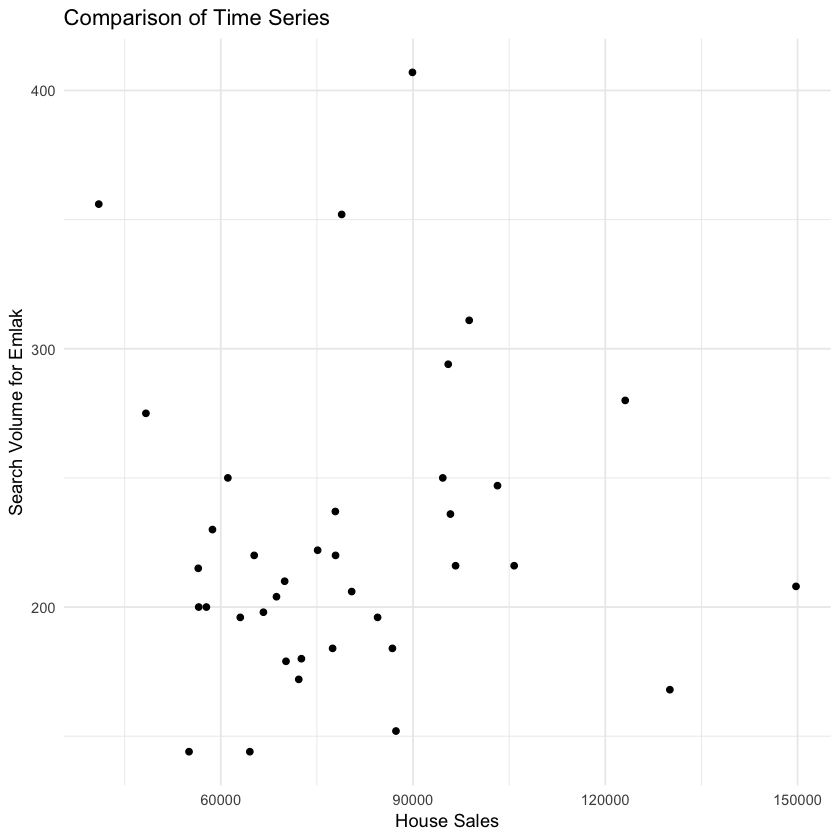

In [142]:
# Read the Excel files
file1 <- "konut.xlsx" 
file2 <- "emlak_keyword.xlsx" 

# Load data from Excel files
data1 <- read_excel(file1)
data2 <- read_excel(file2)

# Plotting the scatterplot
ggplot() +
  geom_point(data = data1, aes(x = KONUTSAT, y = data2$Emlak)) +
  labs(title = "Comparison of Time Series",
       x = "House Sales",
       y = "Search Volume for Emlak") +
  theme_minimal()

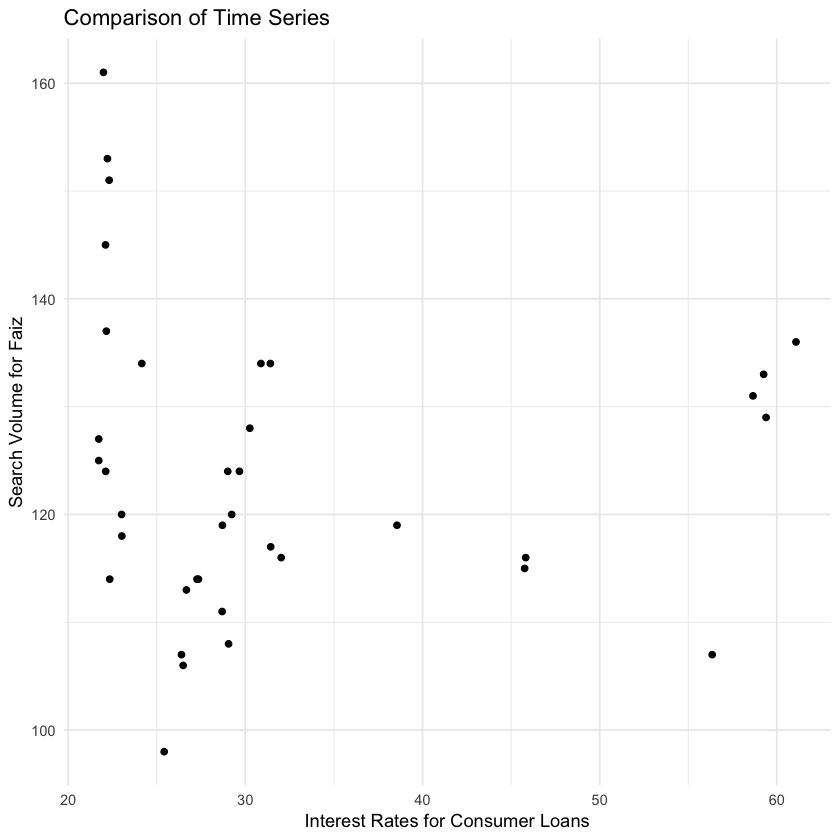

In [140]:
# Read the Excel files
file3 <- "Tüketici Kredisi.xlsx" 
file4 <- "faiz_keyword.xlsx" 

# Load data from Excel files
data3 <- read_excel(file3)
data4 <- read_excel(file4)

# Plotting the scatterplot
ggplot() +
  geom_point(data = data3, aes(x = KTFTUK, y = data4$Faiz)) +
  labs(title = "Comparison of Time Series",
       x = "Interest Rates for Consumer Loans",
       y = "Search Volume for Faiz") +
  theme_minimal()

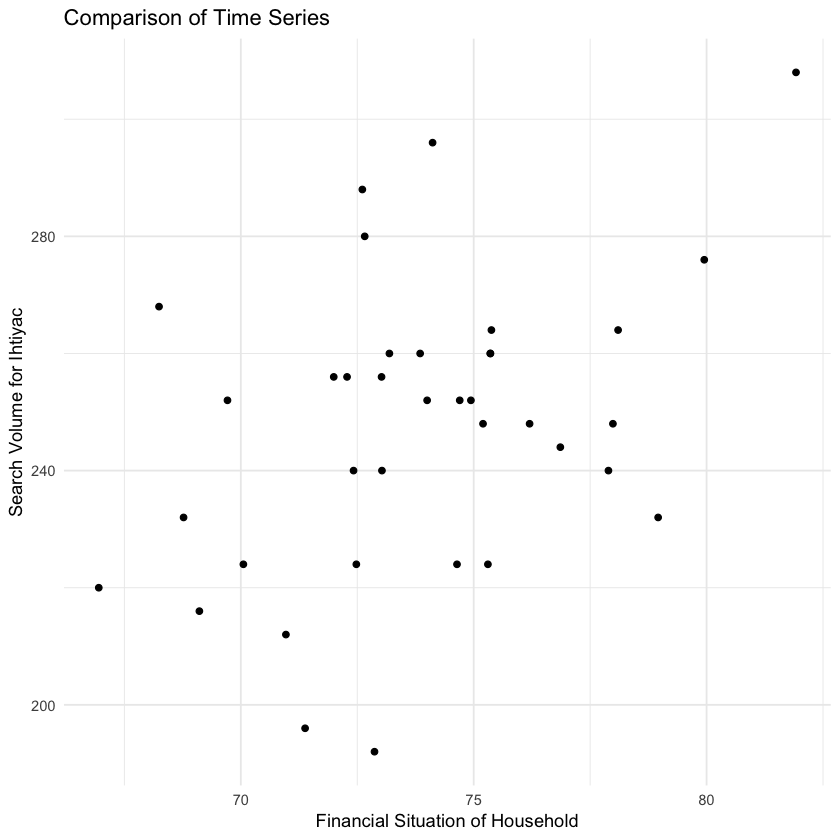

In [143]:
# Read the Excel files
file5 <- "maddi_durum.xlsx" 
file6 <- "ihtiyac.xlsx" 

# Load data from Excel files
data5 <- read_excel(file5)
data6 <- read_excel(file6)

# Plotting the scatterplot
ggplot() +
  geom_point(data = data5, aes(x = TG2, y = data6$Ihtiyac)) +
  labs(title = "Comparison of Time Series",
       x = "Financial Situation of Household",
       y = "Search Volume for Ihtiyac") +
  theme_minimal()

Part 2- Time Series Regression

In [122]:
# Attempt to install 'forecast' package
install.packages("forecast")

# Check if installation was successful
if (!require(forecast)) {
  # If installation failed, print an error message
  message("Error: Unable to load forecast package. Please try installing it manually.")
} else {
  # If installation was successful, load the library
  library(forecast)
}

# Read the data from Excel files
google_trends <- data2
house_sales <- data1

# Merge datasets based on date
merged_data <- merge(google_trends, house_sales, by = "Tarih")

# Prepare data for time series regression
# Convert date column to proper date format
merged_data$Tarih <- ymd(merged_data$Tarih)

# Rename columns for clarity
names(merged_data) <- c("Date", "Search_Volume", "House_Sales")

# Build time series regression model
ts_model <- lm(House_Sales ~ Search_Volume, data = merged_data)

# Print summary of the model
summary(ts_model)

also installing the dependency ‘RcppArmadillo’

Warning message in install.packages("forecast"):
“installation of package ‘RcppArmadillo’ had non-zero exit status”Warning message in install.packages("forecast"):
“installation of package ‘forecast’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: forecast
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘forecast’”Error: Unable to load forecast package. Please try installing it manually.
Warning message:
“All formats failed to parse. No formats found.”


Call:
lm(formula = House_Sales ~ Search_Volume, data = merged_data)

Residuals:
   Min     1Q Median     3Q    Max 
-41480 -14599  -3502  14244  70175 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   75559.43   15426.78   4.898 2.18e-05 ***
Search_Volume    19.33      66.16   0.292    0.772    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23240 on 35 degrees of freedom
Multiple R-squared:  0.002434,	Adjusted R-squared:  -0.02607 
F-statistic: 0.0854 on 1 and 35 DF,  p-value: 0.7718


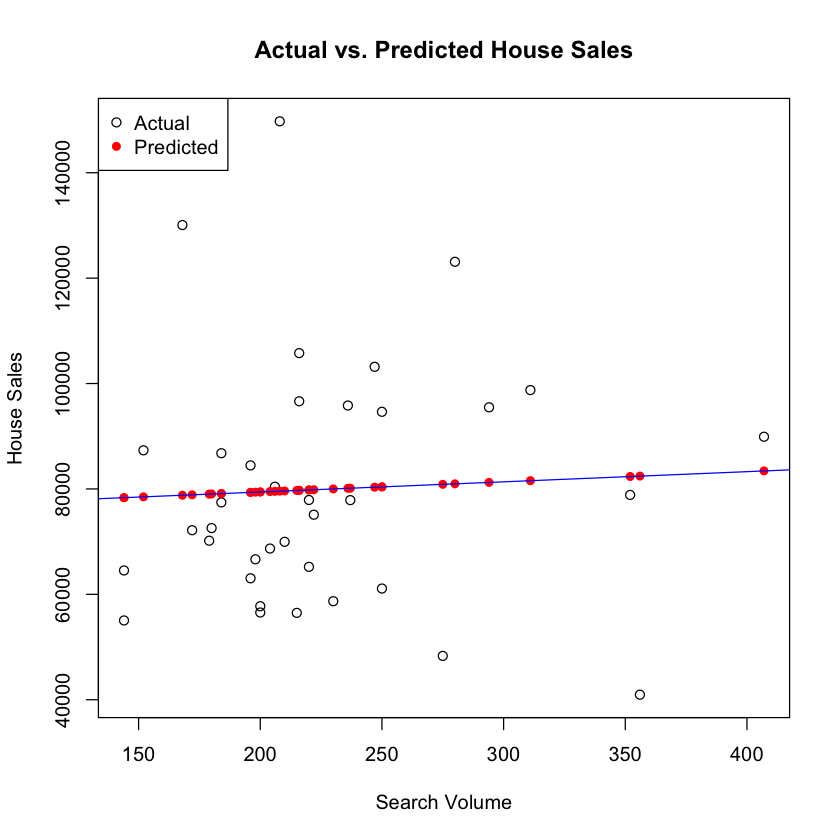

In [123]:
# Predict house sales using the regression model
merged_data$Predicted_House_Sales <- predict(ts_model)

# Create a scatter plot
plot(merged_data$Search_Volume, merged_data$House_Sales, 
     xlab = "Search Volume", ylab = "House Sales", 
     main = "Actual vs. Predicted House Sales")
points(merged_data$Search_Volume, merged_data$Predicted_House_Sales, col = "red", pch = 16)
legend("topleft", legend = c("Actual", "Predicted"), col = c("black", "red"), pch = c(1, 16))

# Add a regression line
abline(ts_model, col = "blue")

In [124]:
# Add lagged values of house sales as predictors
merged_data$Lagged_House_Sales <- lag(merged_data$House_Sales, 1) # Lag by one time period

# Build regression model with lagged house sales, search volume, trend, and seasonality
ts_model_with_lags <- lm(House_Sales ~ Search_Volume + Lagged_House_Sales, data = merged_data)

# Print summary of the new model
summary(ts_model_with_lags)


Call:
lm(formula = House_Sales ~ Search_Volume + Lagged_House_Sales, 
    data = merged_data)

Residuals:
   Min     1Q Median     3Q    Max 
-40496 -14134  -1068  12627  59779 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)        5.595e+04  1.980e+04   2.826  0.00795 **
Search_Volume      2.911e+01  6.504e+01   0.448  0.65739   
Lagged_House_Sales 2.272e-01  1.671e-01   1.359  0.18321   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22600 on 33 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.05996,	Adjusted R-squared:  0.002986 
F-statistic: 1.052 on 2 and 33 DF,  p-value: 0.3605


Warning message in abline(ts_model_with_lags, col = "blue"):
“only using the first two of 3 regression coefficients”

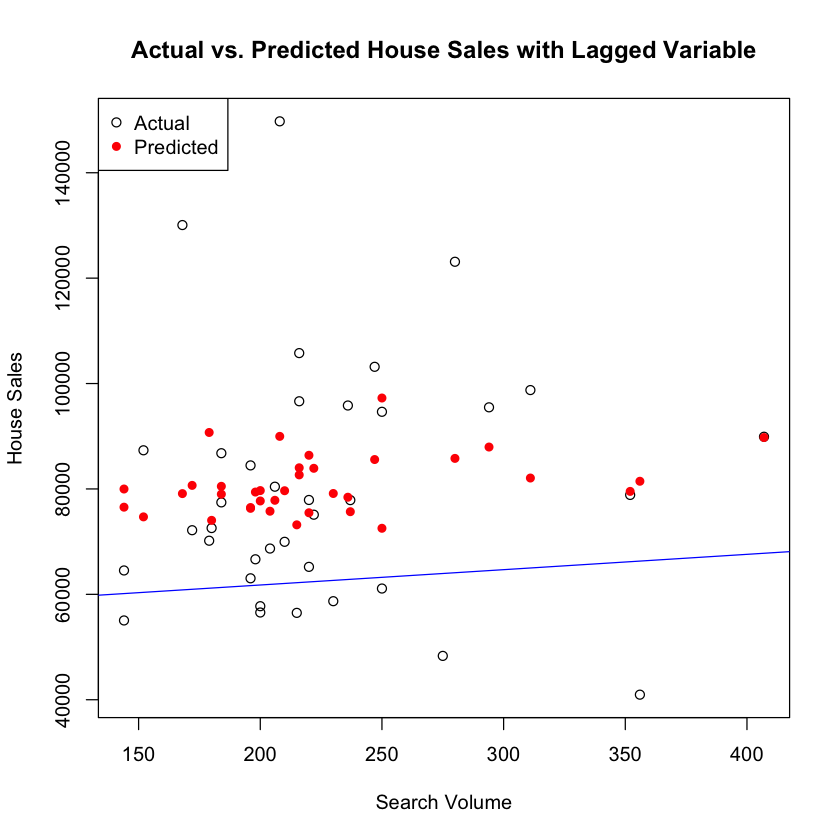

In [126]:
# Predict house sales using the updated regression model
merged_data$Predicted_House_Sales_with_lags <- predict(ts_model_with_lags, newdata = merged_data)

# Create a scatter plot
plot(merged_data$Search_Volume, merged_data$House_Sales, 
     xlab = "Search Volume", ylab = "House Sales", 
     main = "Actual vs. Predicted House Sales with Lagged Variable")
points(merged_data$Search_Volume, merged_data$Predicted_House_Sales_with_lags, col = "red", pch = 16)
legend("topleft", legend = c("Actual", "Predicted"), col = c("black", "red"), pch = c(1, 16))

# Add the regression line
abline(ts_model_with_lags, col = "blue")

In [144]:
# Read the data from Excel files
Consumer_Loan <- data3
google_trends <- data4

# Merge datasets based on date
merged_data <- merge(google_trends, Consumer_Loan, by = "Tarih")

# Prepare data for time series regression
# Convert date column to proper date format
merged_data$Tarih <- ymd(merged_data$Tarih)

# Rename columns for clarity
names(merged_data) <- c("Date", "Search_Volume", "Consumer_Loan")

# Build time series regression model
ts_model <- lm(Consumer_Loan ~ Search_Volume, data = merged_data)

# Print summary of the model
summary(ts_model)

Warning message:
“All formats failed to parse. No formats found.”


Call:
lm(formula = Consumer_Loan ~ Search_Volume, data = merged_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.211  -8.384  -3.914  -0.343  29.671 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)   37.89725   18.52487   2.046   0.0484 *
Search_Volume -0.04769    0.14868  -0.321   0.7503  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.42 on 35 degrees of freedom
Multiple R-squared:  0.002931,	Adjusted R-squared:  -0.02556 
F-statistic: 0.1029 on 1 and 35 DF,  p-value: 0.7503


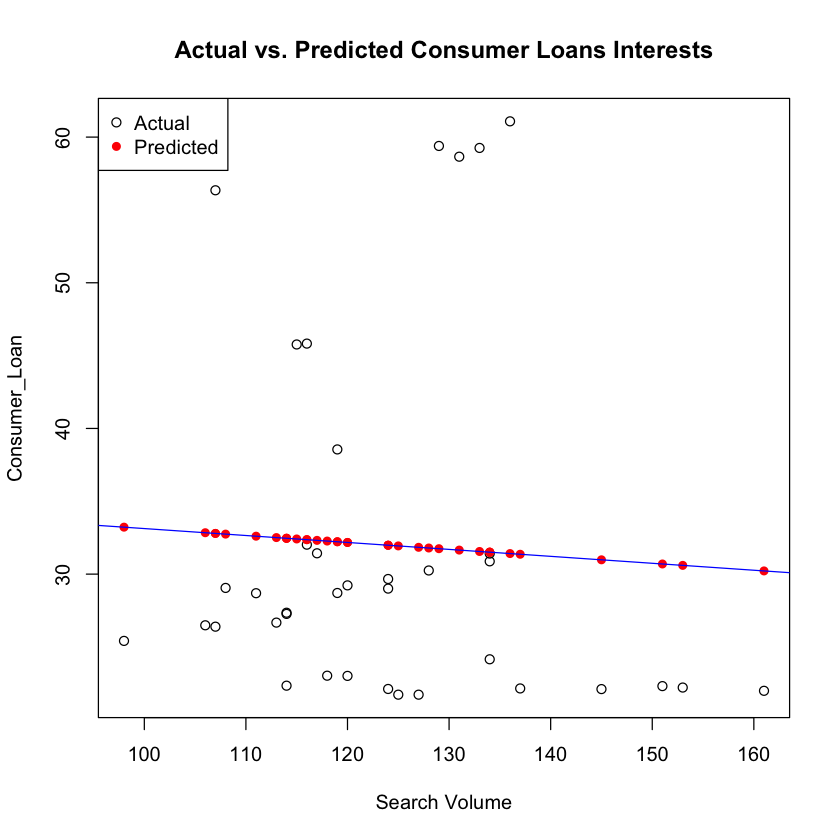

In [146]:
# Predict house sales using the regression model
merged_data$Predicted_Consumer_Loan <- predict(ts_model)

# Create a scatter plot
plot(merged_data$Search_Volume, merged_data$Consumer_Loan, 
     xlab = "Search Volume", ylab = "Consumer_Loan", 
     main = "Actual vs. Predicted Consumer Loans Interests")
points(merged_data$Search_Volume, merged_data$Predicted_Consumer_Loan, col = "red", pch = 16)
legend("topleft", legend = c("Actual", "Predicted"), col = c("black", "red"), pch = c(1, 16))

# Add a regression line
abline(ts_model, col = "blue")

In [147]:
# Read the data from Excel files
Financial_Situation <- data5
google_trends <- data6

# Merge datasets based on date
merged_data <- merge(google_trends, Financial_Situation, by = "Tarih")

# Prepare data for time series regression
# Convert date column to proper date format
merged_data$Tarih <- ymd(merged_data$Tarih)

# Rename columns for clarity
names(merged_data) <- c("Date", "Search_Volume", "Financial_Situation")

# Build time series regression model
ts_model <- lm(Financial_Situation ~ Search_Volume, data = merged_data)

# Print summary of the model
summary(ts_model)

Warning message:
“All formats failed to parse. No formats found.”


Call:
lm(formula = Financial_Situation ~ Search_Volume, data = merged_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6852 -2.2972 -0.0799  2.0474  5.9414 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   60.70657    5.05277  12.015 5.66e-14 ***
Search_Volume  0.05307    0.02030   2.614   0.0131 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.08 on 35 degrees of freedom
Multiple R-squared:  0.1634,	Adjusted R-squared:  0.1395 
F-statistic: 6.836 on 1 and 35 DF,  p-value: 0.01309


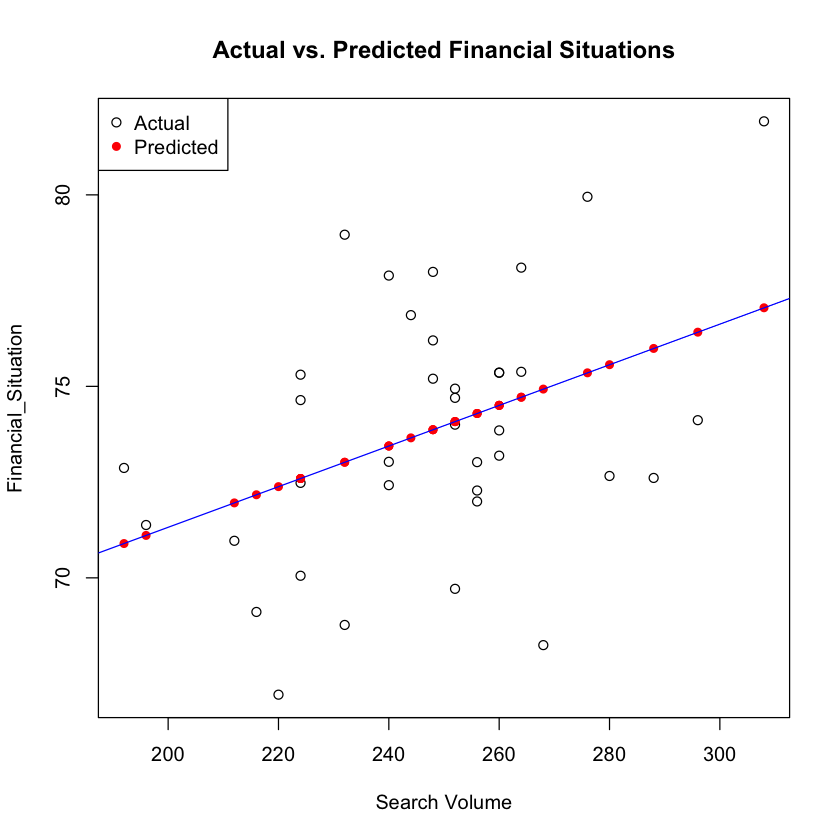

In [148]:
# Predict house sales using the regression model
merged_data$Predicted_Financial_Situation <- predict(ts_model)

# Create a scatter plot
plot(merged_data$Search_Volume, merged_data$Financial_Situation, 
     xlab = "Search Volume", ylab = "Financial_Situation", 
     main = "Actual vs. Predicted Financial Situations")
points(merged_data$Search_Volume, merged_data$Predicted_Financial_Situation, col = "red", pch = 16)
legend("topleft", legend = c("Actual", "Predicted"), col = c("black", "red"), pch = c(1, 16))

# Add a regression line
abline(ts_model, col = "blue")

In all of the above Linear Regressions, Adjusted R square values are notably low. This suggests that only a small fraction of the variability in the data could be explained by the fitted models. However it is important to note that as additional predictor variables are incorporated, the adjusted R square values are expected to improve. Furthermore,  the p-values for the coefficients of predictor variables are very high for the first two models, indicating that the independent variables are not very effective at predicting the outcome/dependent variable. Only the p-values of the coefficient in the third model are lower than the significance level of 0.05. In this case we fail to reject the null hypothesis that the coefficient is equal to 0 and acknowledge that the predictor variable has an effect on the outcome variable.